In [ ]:
# Concrete Compressive Strength Prediction
# Build regression models to predict concrete compressive strength using the UCI dataset.

# 1. Install and import libraries
!pip install numpy pandas matplotlib seaborn scikit-learn openpyxl

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# 2. Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'
df = pd.read_excel(url)
df.columns = [
    'Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
    'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'
]

In [4]:
# Count of NaN values per column
nan_counts = df.isna().sum()

# Count of duplicate rows
duplicate_count = df.duplicated().sum()

print("NaN Values per Column:\n", nan_counts)
print("\nTotal Duplicate Rows:", duplicate_count)

NaN Values per Column:
 Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64

Total Duplicate Rows: 25


In [11]:
# Remove duplicate rows
df = df.drop_duplicates()

# Recheck NaN values
nan_counts = df.isna().sum()

# Recheck duplicate count
duplicate_count = df.duplicated().sum()

print("NaN Values per Column After Removing Duplicates:\n", nan_counts)
print("\nTotal Duplicate Rows After Cleaning:", duplicate_count)


NaN Values per Column After Removing Duplicates:
 Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64

Total Duplicate Rows After Cleaning: 0


   Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age  CompressiveStrength  
0          676.0   28            79.986111  
1          676.0   28            61.887366  
2          594.0  270            40.269535  
3          594.0  365            41.052780  
4          825.5  360            44.296075  
<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1005 non-null   

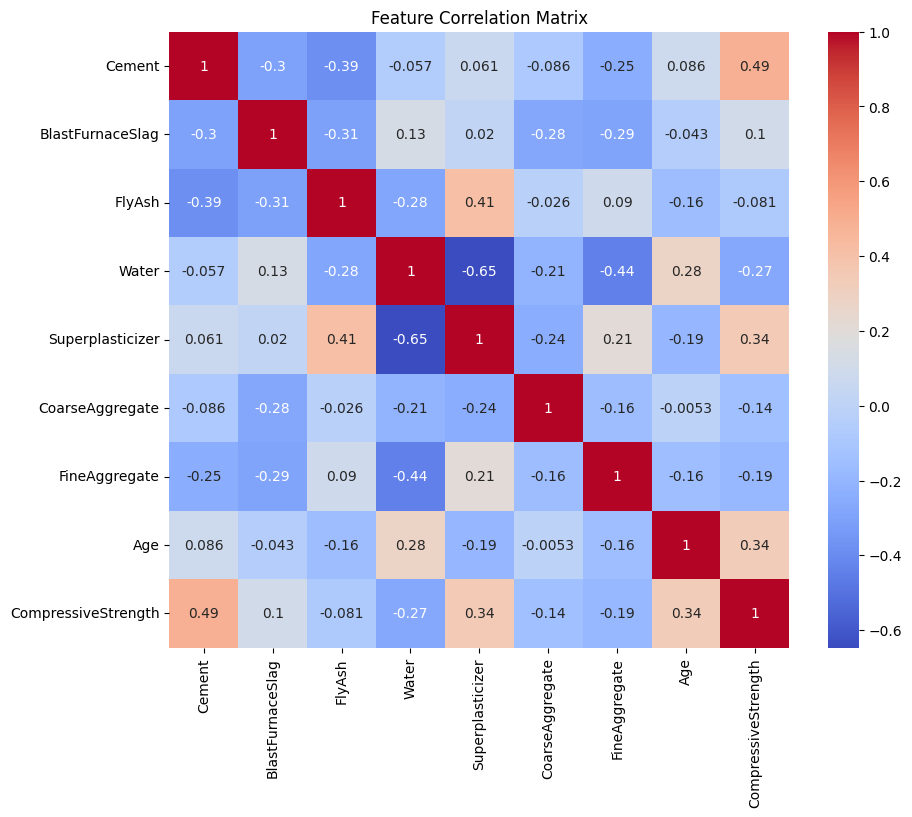

In [12]:
# 3. Exploratory Data Analysis
print(df.head())
print(df.info())
print(df.describe())

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [13]:
# 4. Preprocessing
X = df.drop('CompressiveStrength', axis=1)
y = df['CompressiveStrength']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# 5. Model training and evaluation
models = {
    'OLS Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({
        'Model': name,
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)

            Model         MSE        RMSE       MAE        R2
0  OLS Regression  125.265338  125.265338  8.896028  0.580109
1   Decision Tree   41.918856   41.918856  3.872857  0.859487
2   Random Forest   26.279068   26.279068  3.426361  0.911912


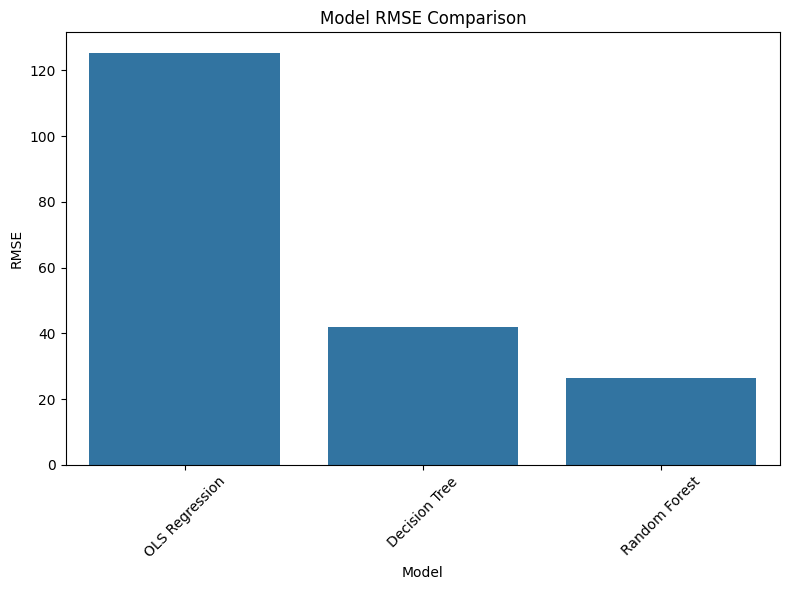

In [15]:
# 6. Visualize comparison
plt.figure(figsize=(8,6))
sns.barplot(data=results_df, x='Model', y='RMSE')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Conclusions
# Compare metrics to select the best model and consider further tuning or cross-validation.
